<a href="https://colab.research.google.com/github/arun-arunisto/PyTorch-Tutorial/blob/main/Tutorial_2_Datasets%26Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets and Dataloaders

PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data. They can be used to prototype and benchmark your model


## Loading the Dataset

Here for example we're going to load `FGVC-aircraft`dataset. ***Fine-Grained Visual Classification of Aircraft (FGVC-Aircraft)*** is a benchmark dataset for the fine grained visual categorization of aircraft.

We're going to load the dataset with the following parameters:

- `root` is the path where the train/test data is stored,
- `train` specifies training or test dataset,
- `download=True` downloads the data from the internet if it’s not available at root.
- `transform` and `target_transform` specify the feature and label transformations

In [3]:
# importing library
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
#training and testing data
training_data = datasets.FGVCAircraft(
    root="data",
    split="train",
    download=True,
    transform=ToTensor()
)

test_data = datasets.FGVCAircraft(
    root="data",
    split="test",
    download=True,
    transform=ToTensor()
)

100%|██████████| 2.75G/2.75G [02:00<00:00, 22.8MB/s]


Extracting data/fgvc-aircraft-2013b.tar.gz to data


In [18]:
img, label = training_data[0]
print('Feature shape:', img.shape)
print('Label:', label)

Feature shape: torch.Size([3, 695, 1024])
Label: 0


## Mapping labels to text


In [7]:
# Get the label mapping dictionary
label_mapping = training_data.class_to_idx

In [8]:
# Print the mapping
print(label_mapping)

{'707-320': 0, '727-200': 1, '737-200': 2, '737-300': 3, '737-400': 4, '737-500': 5, '737-600': 6, '737-700': 7, '737-800': 8, '737-900': 9, '747-100': 10, '747-200': 11, '747-300': 12, '747-400': 13, '757-200': 14, '757-300': 15, '767-200': 16, '767-300': 17, '767-400': 18, '777-200': 19, '777-300': 20, 'A300B4': 21, 'A310': 22, 'A318': 23, 'A319': 24, 'A320': 25, 'A321': 26, 'A330-200': 27, 'A330-300': 28, 'A340-200': 29, 'A340-300': 30, 'A340-500': 31, 'A340-600': 32, 'A380': 33, 'ATR-42': 34, 'ATR-72': 35, 'An-12': 36, 'BAE 146-200': 37, 'BAE 146-300': 38, 'BAE-125': 39, 'Beechcraft 1900': 40, 'Boeing 717': 41, 'C-130': 42, 'C-47': 43, 'CRJ-200': 44, 'CRJ-700': 45, 'CRJ-900': 46, 'Cessna 172': 47, 'Cessna 208': 48, 'Cessna 525': 49, 'Cessna 560': 50, 'Challenger 600': 51, 'DC-10': 52, 'DC-3': 53, 'DC-6': 54, 'DC-8': 55, 'DC-9-30': 56, 'DH-82': 57, 'DHC-1': 58, 'DHC-6': 59, 'DHC-8-100': 60, 'DHC-8-300': 61, 'DR-400': 62, 'Dornier 328': 63, 'E-170': 64, 'E-190': 65, 'E-195': 66, 'EMB

In [9]:
# Get the text description for a given label (e.g., label 0)
label_text = list(label_mapping.keys())[list(label_mapping.values()).index(0)]
print(label_text)

707-320


## Iterating and visualizing the dataset

In [11]:
labels_map = {idx:label for label, idx in label_mapping.items()}

In [12]:
labels_map

{0: '707-320',
 1: '727-200',
 2: '737-200',
 3: '737-300',
 4: '737-400',
 5: '737-500',
 6: '737-600',
 7: '737-700',
 8: '737-800',
 9: '737-900',
 10: '747-100',
 11: '747-200',
 12: '747-300',
 13: '747-400',
 14: '757-200',
 15: '757-300',
 16: '767-200',
 17: '767-300',
 18: '767-400',
 19: '777-200',
 20: '777-300',
 21: 'A300B4',
 22: 'A310',
 23: 'A318',
 24: 'A319',
 25: 'A320',
 26: 'A321',
 27: 'A330-200',
 28: 'A330-300',
 29: 'A340-200',
 30: 'A340-300',
 31: 'A340-500',
 32: 'A340-600',
 33: 'A380',
 34: 'ATR-42',
 35: 'ATR-72',
 36: 'An-12',
 37: 'BAE 146-200',
 38: 'BAE 146-300',
 39: 'BAE-125',
 40: 'Beechcraft 1900',
 41: 'Boeing 717',
 42: 'C-130',
 43: 'C-47',
 44: 'CRJ-200',
 45: 'CRJ-700',
 46: 'CRJ-900',
 47: 'Cessna 172',
 48: 'Cessna 208',
 49: 'Cessna 525',
 50: 'Cessna 560',
 51: 'Challenger 600',
 52: 'DC-10',
 53: 'DC-3',
 54: 'DC-6',
 55: 'DC-8',
 56: 'DC-9-30',
 57: 'DH-82',
 58: 'DHC-1',
 59: 'DHC-6',
 60: 'DHC-8-100',
 61: 'DHC-8-300',
 62: 'DR-400',


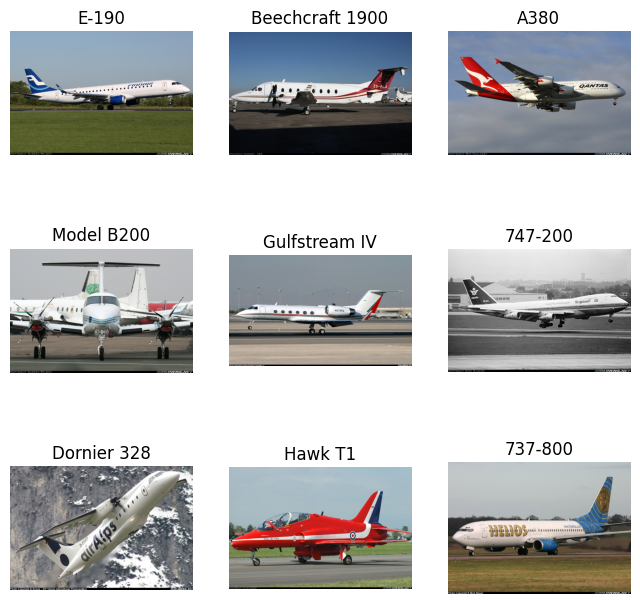

In [14]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    # Permute the dimensions of the image to (height, width, channels)
    plt.imshow(img.permute(1, 2, 0))
plt.show()

## Creating own dataset

We have images on this directory `/content/data/fgvc-aircraft-2013b/data/images` next we're going to create a ***CSV** file with images and labels like below:

```
<filename>, <label>
<filename>, <label>
...
<filename>, <label>
```
for showcase to how to create own dataset

In [36]:
with open("/content/data/fgvc-aircraft-2013b/data/images_family_train.txt", "r") as f:
  lines = f.readlines()
print(len(lines))

3334


In [47]:
for i in range(len(lines)):
  try:
    print(lines[i][:7], label_mapping[lines[i][8:].strip()])
  except:
    continue

1621237 22
1561989 22
1013358 22
0853397 22
1758544 22
0618871 22
0681535 22
0765780 22
1346444 22
0949946 22
0127637 22
0843145 22
0094394 22
2084806 22
1446456 22
0487316 22
0181735 22
0114420 22
0215875 22
2175624 22
0994754 22
0901514 22
1132271 22
0203222 22
1486858 22
1906073 22
0923502 22
1027362 22
1831097 22
1464252 22
1270583 22
1313523 22
0396589 22
1607382 25
0934705 25
1312250 25
2098098 25
1351410 25
1945366 25
1165189 25
1255446 25
1539428 25
1058491 25
1117069 25
1380336 25
0481842 25
1227531 25
1658655 25
1909808 25
1639831 25
1056320 25
1296212 25
1355236 25
1385121 25
1814161 25
2210075 25
1871272 25
1869981 25
1864330 25
1355481 25
1376172 25
1165384 25
1103086 25
1191117 25
2090080 25
1396939 25
1757004 25
1879116 25
0481841 25
1018875 25
0205770 25
2146985 25
1237633 25
1031451 25
1483441 25
1589410 25
0709185 25
1363952 25
0625763 25
1003143 25
1564781 25
0979624 25
1636535 25
1105737 25
0973383 25
2246105 25
0445491 25
1818746 25
1327284 25
0672114 25
0248132 25

In [48]:
import csv

In [50]:
with open("annotations.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(["filename", "label"])
  for i in range(len(lines)):
    try:
      filename = f"{lines[i][:7]}.jpg"
      label = label_mapping[lines[i][8:].strip()]
      writer.writerow([filename, label])
    except:
      continue
print("CSV file created successfully!!")

CSV file created successfully!!


In [51]:
import pandas as pd

In [52]:
csv_annotate_file = pd.read_csv("annotations.csv")
csv_annotate_file.head()

,filename,label
0,1621237.jpg,22
1,1561989.jpg,22
2,1013358.jpg,22
3,0853397.jpg,22
4,1758544.jpg,22


In [54]:
csv_annotate_file.label.value_counts()

,count
label,
25,133
86,67
45,67
99,34
93,34
78,34
63,34
84,34
57,34


A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`. Take a look at this implementation; the `FGVC-aircraft` images are stored in a directory `/content/data/fgvc-aircraft-2013b/data/images`, and their labels are stored separately in a CSV file `/content/annotations.csv`.

In [55]:
import os
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

- The `__init__` function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms.

- The `__len__` function returns the number of samples in our dataset.

- The `__getitem__` function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

## Preparing data with dataloaders

The `Dataset` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [60]:
from torchvision import transforms
#training and testing data
training_data = datasets.FGVCAircraft(
    root="data",
    split="train",
    download=True,
    transform=transforms.Compose([
        transforms.Resize((224, 224)),  # Resize all images to a fixed size
        transforms.ToTensor()
    ])
)

In [61]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

## Iterating through DataLoader

We have loaded that dataset into the `DataLoader` and can iterate through the dataset as needed. Each iteration below returns a batch of `train_features` and `train_labels` (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


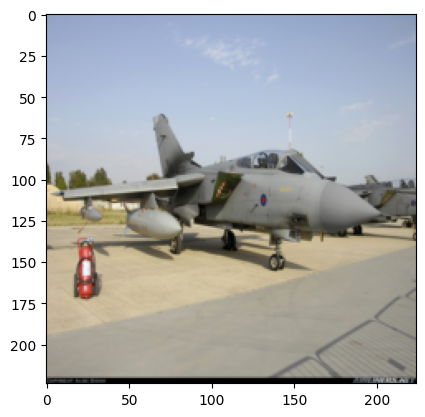

Label: 96


In [64]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(f"Label: {label}")